In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
fifa=pd.read_csv('../data/male_players.csv')

- Removing rows where 'player_id' is null and modify the original dataframe

In [3]:
fifa.dropna(subset=['player_id'], inplace=True)
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524287 entries, 0 to 1048545
Columns: 110 entries, player_id to player_face_url
dtypes: float64(63), object(47)
memory usage: 444.0+ MB


In [4]:
fifa['fifa_version'].value_counts()

fifa_version
22.0    357613
23.0    166674
Name: count, dtype: int64

In [5]:
fifa22=fifa[fifa['fifa_version'] == 22]
fifa23=fifa[fifa['fifa_version'] == 23]

- drop rows with duplicate player_id

In [6]:
fifa23=fifa23.drop_duplicates(subset=['player_id'])

In [7]:
fifa23['player_id'].value_counts()

player_id
262759.0    1
158023.0    1
165153.0    1
188545.0    1
192985.0    1
           ..
239085.0    1
212831.0    1
212622.0    1
210257.0    1
208722.0    1
Name: count, Length: 20621, dtype: int64

In [8]:
fifa23['long_name'].value_counts()

long_name
Ibrahim Cissé                    3
王鹏                               3
Reece James                      2
李帅                               2
이재성 李在成                          2
                                ..
Keylor Navas Gamboa              1
손흥민 孙兴慜                          1
Marcos Aoás Corrêa               1
João Pedro Cavaco Cancelo        1
Thibaut Nicolas Marc Courtois    1
Name: count, Length: 20587, dtype: int64

In [9]:
print(list(fifa23.columns))

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

Each player in FIFA Ultimate Team has an overall rating as well as six scores for the key stats; Pace, Shooting, Passing, Dribbling, Defending, and Physical. These stats are combined with a player's international recognition to calculate the player's overall rating

In [10]:
fifa23['league_level'].value_counts()

league_level
1.0    15227
2.0     3244
3.0     1300
4.0      715
5.0       30
Name: count, dtype: int64

In [11]:
# Get the maximum 'overall' rating  for each 'league_level'
max_overall_rating_by_league_division = fifa23.groupby('league_level')['overall'].max()
max_overall_rating_by_league_division

league_level
1.0    91.0
2.0    80.0
3.0    73.0
4.0    68.0
5.0    67.0
Name: overall, dtype: float64

In [12]:
outfield_columns=['long_name','player_positions', 'overall','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',]
outfield_players=fifa23[fifa23['player_positions'] != "GK"][outfield_columns]

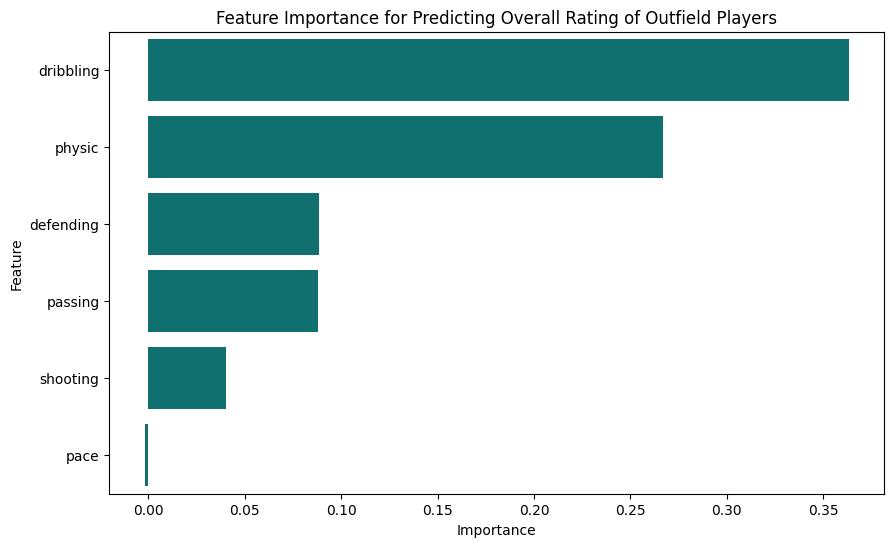

In [13]:
# Features and target
X = outfield_players[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
y = outfield_players['overall']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get feature importances
importance = model.coef_

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='teal')
plt.title('Feature Importance for Predicting Overall Rating of Outfield Players')
plt.show()

In [14]:
goalkeeper_columns=['long_name','overall', 'goalkeeping_diving',
                     'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
                     'goalkeeping_reflexes', 'goalkeeping_speed']
goalkeepers=fifa23[fifa23['player_positions'] == "GK"][goalkeeper_columns]

C:\Users\2dsoo\AppData\Local\Temp\ipykernel_7008\844161156.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


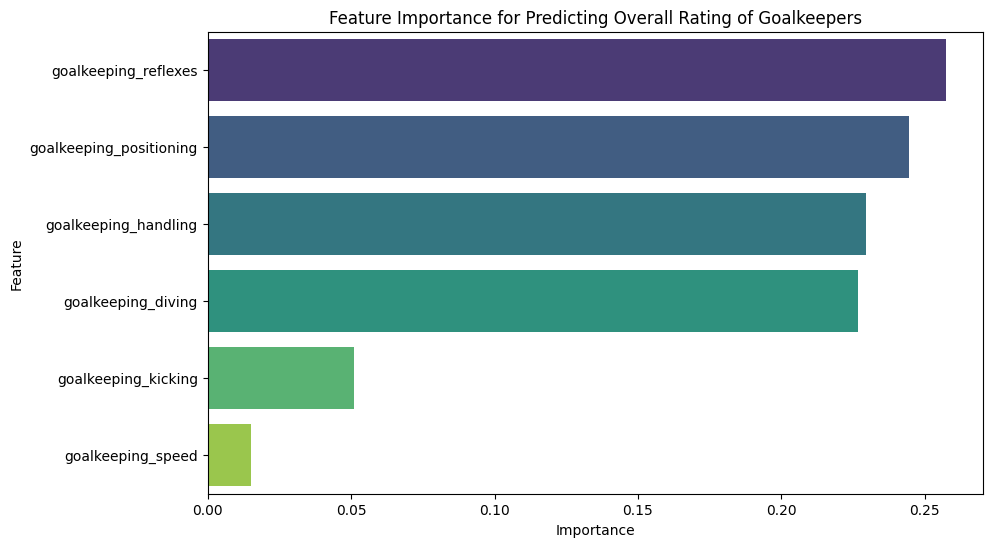

In [15]:
# Features and target
X = goalkeepers[['goalkeeping_diving',
                     'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
                     'goalkeeping_reflexes', 'goalkeeping_speed']]
y = goalkeepers['overall']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get feature importances
importance = model.coef_

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Predicting Overall Rating of Goalkeepers')
plt.show()


In [16]:
importance_df

,Feature,Importance
4,goalkeeping_reflexes,0.257279
3,goalkeeping_positioning,0.244496
1,goalkeeping_handling,0.229651
0,goalkeeping_diving,0.226847
2,goalkeeping_kicking,0.051170
5,goalkeeping_speed,0.015009
